#### Here in this ipynb file we will find various probability of the the Dataframe on different queries 

### ***All are realated to the Discrete values***

***Importing the file for the analysis***

In [26]:
# Importing the lib.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Importing the funtion
from Assumption_check_prob import check_data_for_probability_analysis
from calculate_long_stay_probability import calculate_long_stay_probability_function

In [27]:
# Import the file csv to get the columns Data 
df=pd.read_csv('C:/Users/5530/OneDrive/Desktop/Mall_Customer_Segmentation/Data_files/customer_arrivals_removed_outliers_.csv')

This line calculates the Probability Mass Function (PMF) for the ***Hour*** column, which tells us the relative frequency (probability) of customer arrivals in each hour of the day.


 Analyzing column: 'Hour'

 Data Type: int64
 Number of Unique Values: 12
 Sample Size: 195
 Likely Discrete

 Distribution Plot:


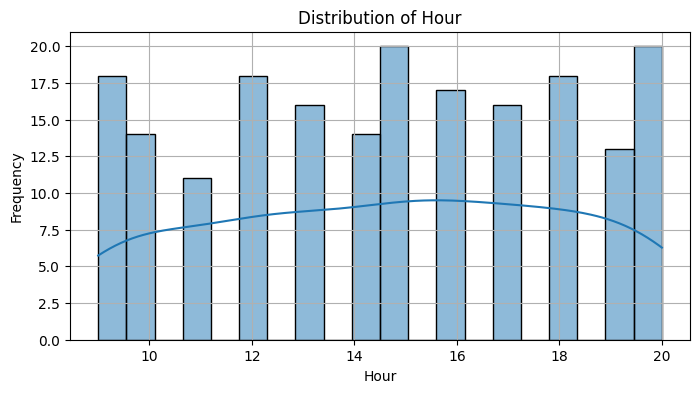


Prob Distribtuion
------------------------------------------------------------
9 :0.092
10 :0.072
11 :0.056
12 :0.092
13 :0.082
14 :0.072
15 :0.103
16 :0.087
17 :0.082
18 :0.092
19 :0.067
20 :0.103


In [28]:
check_data_for_probability_analysis(df,'Hour')
hourly_PMF=df['Hour'].value_counts(normalize=True).sort_index().round(3)
j=8
print(f'\nProb Distribtuion')
print('-'*60)
for i in hourly_PMF:
  j+=1
  print(f'{j} :{i}')


***Visual Representation of the Probability Mass Function (PMF) for the ***Hour*** column***

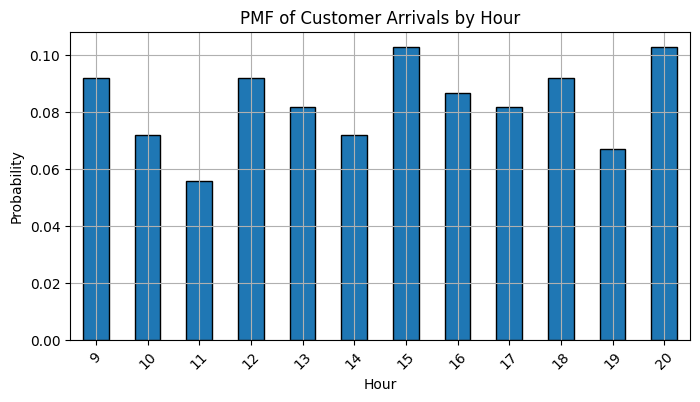

In [29]:
plt.figure(figsize=(8,4))
hourly_PMF.plot(kind='bar', edgecolor='black')
plt.xlabel('Hour')
plt.ylabel('Probability')
plt.title('PMF of Customer Arrivals by Hour')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


### PMF for the weekdays and the weekend according to Hour column

***Finding the weekdays and Weekends***

In [30]:
weekdays =['Monday','Tuesday','Wednesday','Thursday','Friday']
weekends= ['Saturday','Sunday']

Weekdays=df[df['Day'].isin(weekdays)]
Weekends=df[df['Day'].isin(weekends)]

***Getting the prob according to the days Hour***

In [31]:
# Step 3: Compute PMFs (normalized value_counts)
weekday_pmf = Weekdays['Hour'].value_counts(normalize=True).sort_index().round(3)
weekend_pmf = Weekends['Hour'].value_counts(normalize=True).sort_index().round(3)

***Visual representation of the Weekdays and weekends***

***Weekdays***

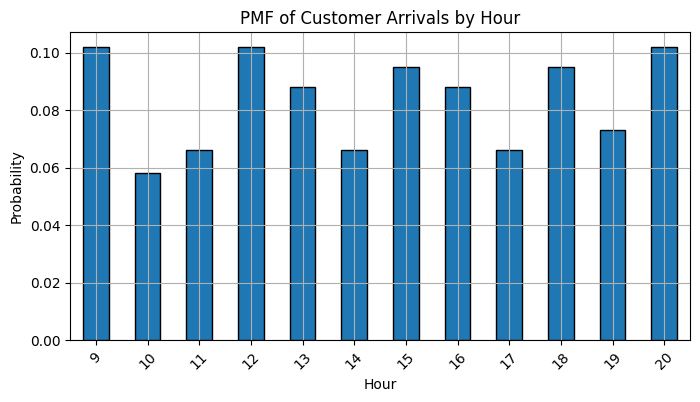

In [32]:
plt.figure(figsize=(8,4))
weekday_pmf.plot(kind='bar', edgecolor='black')
plt.xlabel('Hour')
plt.ylabel('Probability')
plt.title('PMF of Customer Arrivals by Hour')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

***Weekends***

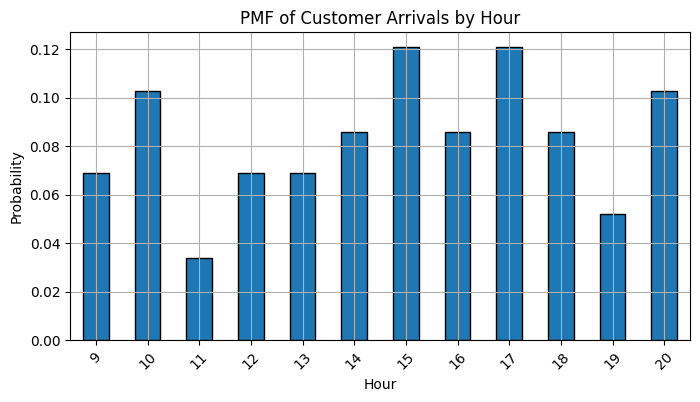

In [33]:
plt.figure(figsize=(8,4))
weekend_pmf.plot(kind='bar', edgecolor='black')
plt.xlabel('Hour')
plt.ylabel('Probability')
plt.title('PMF of Customer Arrivals by Hour')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

 ***Business Insight*** :
 ~ Customer traffic during weekends and weekdays both  show heavier flow of customer in  mornings 9:00 AM to 10:00 Am

 ~ Low footfall of customer in weekendsduring time period of ***11 AM- 1 PM***,High rise of footfall comes btw ***3:00 PM - 6:00 PM*** 

 ~  Weekday traffic is more spread out evenly , starting a bit earlier and get low only on ***10 AM - 11 AM***.

***This helps in:***

-> Scheduling more staff on weekends and weekdays post ***9-10 AM*** always high flow of customer 

-> Running time-bound discounts or Product promotions on ***weekend mornings and in afternoon***

##### -----------------------------------------------------------------------------------------

#### Given how often a customer visits, and assuming an average long-stay probability of ~40%

In [38]:
result = calculate_long_stay_probability_function(df,prob=0.2)
print(result.head(5))

   Arrival_Count  Duration_min  prob_long_stay
0             30           140    8.215206e-13
1             18           122    6.583385e-09
2             20           110    6.015773e-09
3             19           122    1.485376e-09
4             18           193    6.583385e-09


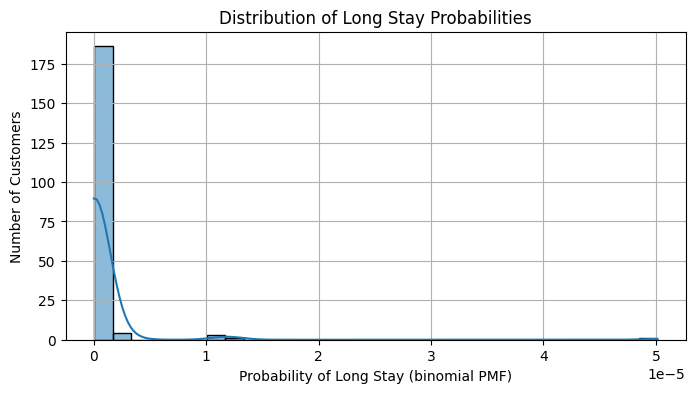

In [39]:
#Figure Size
plt.figure(figsize=(8, 4))

#Values to be shown in Graph
sns.histplot(df['prob_long_stay'], bins=30, kde=True, edgecolor='black')
plt.title("Distribution of Long Stay Probabilities")
plt.xlabel("Probability of Long Stay (binomial PMF)")
plt.ylabel("Number of Customers")
plt.grid(True)
plt.show()

A peak near 0 → meaning most customers have very low probability of achieving 40% long stays based on binomial assumptions

A tail to the right → a few customers have relatively higher probabilities (these could be your high-engagement users)

***Visualization to find which customer come more spend more time or which come less***

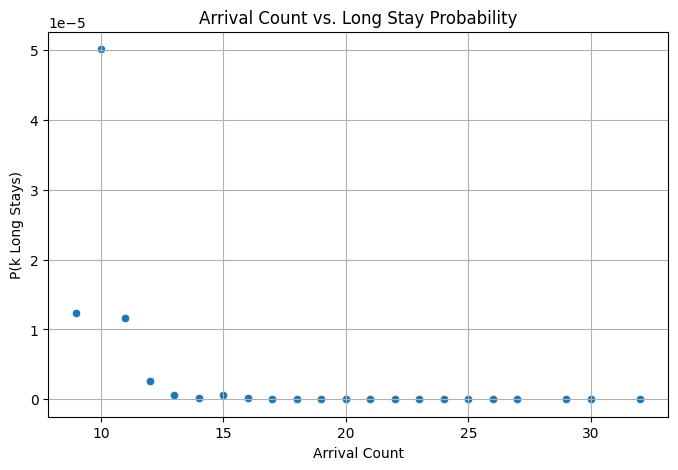

In [40]:
#Figure size
plt.figure(figsize=(8, 5))

#Values to be shown in Graph
sns.scatterplot(data=df, x='Arrival_Count', y='prob_long_stay')
plt.title("Arrival Count vs. Long Stay Probability")
plt.xlabel("Arrival Count")
plt.ylabel("P(k Long Stays)")
plt.grid(True)
plt.show()


***Find out the top customerID which spend more time in the Mall***

C:\Users\5530\AppData\Local\Temp\ipykernel_28924\594411548.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_customers, x='CustomerID', y='prob_long_stay', palette='viridis')


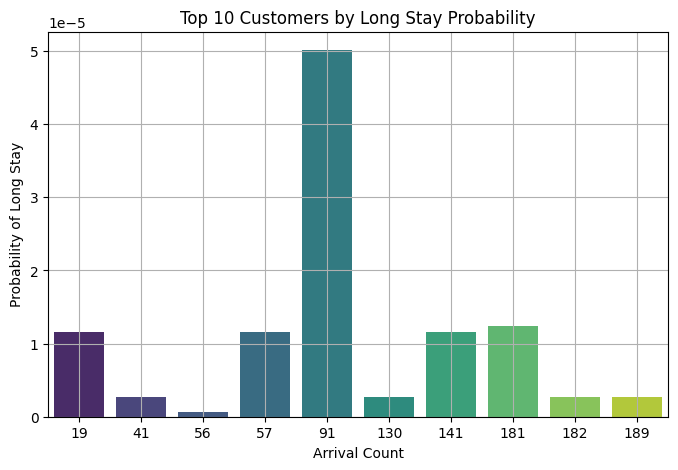

In [41]:
top_customers = df.sort_values('prob_long_stay', ascending=False).head(10)
# print(top_customers)

#Figure size
plt.figure(figsize=(8, 5))

#Values to be shown in Graph
sns.barplot(data=top_customers, x='CustomerID', y='prob_long_stay', palette='viridis')
plt.title("Top 10 Customers by Long Stay Probability")
plt.xlabel("Arrival Count")
plt.ylabel("Probability of Long Stay")
plt.grid(True)
plt.show()


Business Insight: -
Customers with higher arrival counts do not necessarily have a ***higher probability of long stays***.

Use this data to identify ***high-value repeat visitors*** with consistently long engagement time — perfect for ***VIP loyalty or premium services***.

We observed that over ***80% of customers*** have a very ***low probability*** of reaching the threshold for frequent long stays.
But there's a small group with much higher probabilities — these are prime targets for loyalty programs, high-touch marketing, or VIP services.